<a href="https://colab.research.google.com/github/AmritaANair/Reward_Side_Channels_Physical_RL_Implementation/blob/main/MOUNTAIN_CAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps
+ Installing dependencies
+ Introduction
+ MountainCarContinuous-v0


In [1]:
!pip install stable-baselines3[extra]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 170 kB 5.2 MB/s 
     |████████████████████████████████| 1.5 MB 50.1 MB/s 
     |████████████████████████████████| 1.6 MB 38.4 MB/s 
     |████████████████████████████████| 237 kB 55.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51 kB 6.5 MB/s 
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616821 sha256=c0d8f2fc8d5883ad5f4d5cce85fdcc31572e1622de8d9c45c95da6a67908ae97
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.4.2-py3-none-any.whl size=441028 sha256=2a2af36965c004f15baff3ffaaf49539afb0fba13d867e50f2f3a86ab4f52f2f
  Stored in directory: /root/.cache/pip/whe

In [2]:
import gym

from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env
!pip install pyvirtualdisplay
!pip install piglet
!apt-get install python-opengl -y
!pip install gym
!pip install pyglet==1.5.24
!pip install kora
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y
!apt-get update
!apt-get install xvfb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.0 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  freeglut3
Suggested packages:
  libgle3
The following NEW packages will be installed:
  freeglut3 python-opengl
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 570 kB of archives.
After this operation, 5,733 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+df

In [3]:
!git clone https://github.com/mandrakedrink/PPO-pytorch
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
!pip install roboschool==1.0.48 gym==0.15.4   # roboschool envs (https://github.com/openai/roboschool/issues/210)
!pip install box2d-py   # 2d-boxes envs

# requirements for virtual display
!apt install python-opengl 
!apt install ffmpeg
!apt install xvfb
!pip install pyvirtualdisplay
!pip install xvfbwrapper


from pyvirtualdisplay import Display
import sys

# Add ppo module in system path
sys.path.append("PPO-pytorch/")

# Start virtual display
display = Display(visible=0, size=(600, 400))
display.start()

Cloning into 'PPO-pytorch'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 27 (delta 4), reused 15 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement roboschool==1.0.48 (from versions: 1.0.1, 1.0.3, 1.0.6, 1.0.7, 1.0.8, 1.0.15, 1.0.16, 1.0.17, 1.0.18, 1.0.19, 1.0.20, 1.0.34)
ERROR: No matching distribution found for roboschool==1.0.48
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 374 kB 4.7 MB/s 
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
    Running setup.py install for box2d-py ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 

In [4]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt

import gym

from ppo.ppo import PPOAgent
from utils import show_video, convert_gif

In [5]:
class GlobalConfig:
    def __init__(self):
        self.seed = 555
        self.path2save_train_history = "/content/"

def seed_everything(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

config = GlobalConfig()
seed_everything(config.seed)

In [6]:
env = gym.make("MountainCarContinuous-v0")  # initializing environment
# env's parameters
print("Action space:", env.action_space)
print("Action sample:", env.action_space.sample())
print("Observations space:", env.observation_space)
print("Observation sample:", env.observation_space.sample())

# other specific parameters
print("Max speed:", env.env.max_speed)
print("Reward range:", env.env.reward_range)

Action space: Box([-1.], [1.], (1,), float32)
Action sample: [-0.26175123]
Observations space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Observation sample: [-1.0254285  0.0629824]
Max speed: 0.07
Reward range: (-inf, inf)


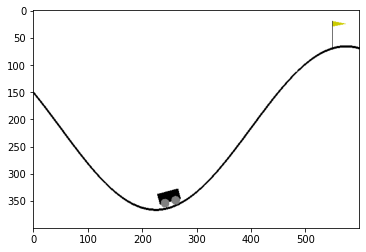

In [7]:
env.reset() # initial observation
plt.imshow(env.render("rgb_array"));

### MountainCarContinuous-v0

In [8]:
def make_env():
    # environment
    env_id = "MountainCarContinuous-v0"
    env = gym.make(env_id)
    env.seed(config.seed)
    return env 

In [9]:
agent = PPOAgent(
    make_env,
    obs_dim = 2,
    act_dim = 1,
    gamma = 0.99,
    lamda = 0.95,
    entropy_coef = 0.003,
    epsilon = 0.2,
    value_range = 0.5,
    rollout_len = 1000,
    total_rollouts = 50000,
    num_epochs = 64,
    batch_size = 1000,
    is_evaluate = False,
    continuous = True,
    solved_reward = 92,
    actor_lr = 1e-3,
    critic_lr = 5e-3,
    path2save_train_history = config.path2save_train_history,
)

device: cpu


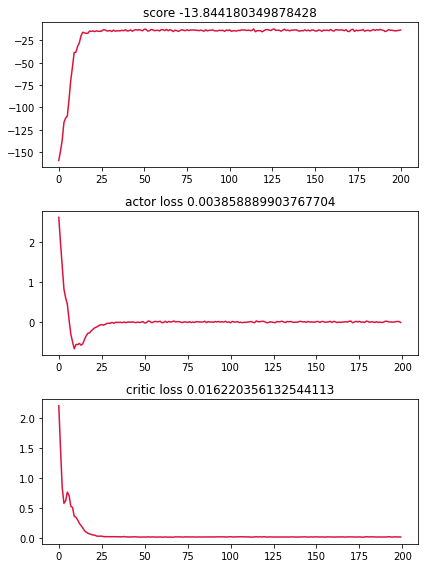

In [ ]:
%%time
agent.train()

In [ ]:
agent.env =  gym.wrappers.Monitor(agent.env, "MountainCarContinuous-v0/videos", force=True)
agent.evaluate()

In [ ]:
show_video("/content/MountainCarContinuous-v0/videos")

In [ ]:
convert_gif("/content/MountainCarContinuous-v0/videos")

Env code:

In [ ]:
# -*- coding: utf-8 -*-
"""
@author: Olivier Sigaud

A merge between two sources:

* Adaptation of the MountainCar Environment from the "FAReinforcement" library
of Jose Antonio Martin H. (version 1.0), adapted by  'Tom Schaul, tom@idsia.ch'
and then modified by Arnaud de Broissia

* the OpenAI/gym MountainCar environment
itself from
http://incompleteideas.net/sutton/MountainCar/MountainCar1.cp
permalink: https://perma.cc/6Z2N-PFWC
"""

import math

import numpy as np

import gym
from gym import spaces
from gym.utils import seeding


class Continuous_MountainCarEnv(gym.Env):
    """
    Description:
        The agent (a car) is started at the bottom of a valley. For any given
        state the agent may choose to accelerate to the left, right or cease
        any acceleration.
    Observation:
        Type: Box(2)
        Num    Observation               Min            Max
        0      Car Position              -1.2           0.6
        1      Car Velocity              -0.07          0.07
    Actions:
        Type: Box(1)
        Num    Action                    Min            Max
        0      the power coef            -1.0           1.0
        Note: actual driving force is calculated by multipling the power coef by power (0.0015)

    Reward:
         Reward of 100 is awarded if the agent reached the flag (position = 0.45) on top of the mountain.
         Reward is decrease based on amount of energy consumed each step.

    Starting State:
         The position of the car is assigned a uniform random value in
         [-0.6 , -0.4].
         The starting velocity of the car is always assigned to 0.

    Episode Termination:
         The car position is more than 0.45
         Episode length is greater than 200
    """

    metadata = {"render.modes": ["human", "rgb_array"], "video.frames_per_second": 30}

    def __init__(self, goal_velocity=0):
      
        self.min_action = -1.0
        self.max_action = 1.0
        self.min_position = -1.2
        self.max_position = 0.6
        self.max_speed = 0.07
        self.goal_position = (
            0.45  # was 0.5 in gym, 0.45 in Arnaud de Broissia's version
        )
        self.goal_velocity = goal_velocity
        self.power = 0.0015

        self.low_state = np.array(
            [self.min_position, -self.max_speed], dtype=np.float32
        )
        self.high_state = np.array(
            [self.max_position, self.max_speed], dtype=np.float32
        )

        self.viewer = None

        self.action_space = spaces.Box(
            low=self.min_action, high=self.max_action, shape=(1,), dtype=np.float32
        )
        self.observation_space = spaces.Box(
            low=self.low_state, high=self.high_state, dtype=np.float32
        )

        self.seed()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):

        position = self.state[0]
        velocity = self.state[1]
        force = min(max(action[0], self.min_action), self.max_action)

        velocity += force * self.power - 0.0025 * math.cos(3 * position)
        if velocity > self.max_speed:
            velocity = self.max_speed
        if velocity < -self.max_speed:
            velocity = -self.max_speed
        position += velocity
        if position > self.max_position:
            position = self.max_position
        if position < self.min_position:
            position = self.min_position
        if position == self.min_position and velocity < 0:
            velocity = 0

        # Convert a possible numpy bool to a Python bool.
        done = bool(position >= self.goal_position and velocity >= self.goal_velocity)

        reward = 0
        if done:
            reward = 100.0
        reward -= math.pow(action[0], 2) * 0.1

        self.state = np.array([position, velocity], dtype=np.float32)
        return self.state, reward, done, {}

    def reset(self):
        self.state = np.array([self.np_random.uniform(low=-0.6, high=-0.4), 0])
        return np.array(self.state, dtype=np.float32)

    def _height(self, xs):
        return np.sin(3 * xs) * 0.45 + 0.55

    def render(self, mode="human"):
        screen_width = 600
        screen_height = 400

        world_width = self.max_position - self.min_position
        scale = screen_width / world_width
        carwidth = 40
        carheight = 20

        if self.viewer is None:
            from gym.envs.classic_control import rendering

            self.viewer = rendering.Viewer(screen_width, screen_height)
            xs = np.linspace(self.min_position, self.max_position, 100)
            ys = self._height(xs)
            xys = list(zip((xs - self.min_position) * scale, ys * scale))

            self.track = rendering.make_polyline(xys)
            self.track.set_linewidth(4)
            self.viewer.add_geom(self.track)

            clearance = 10

            l, r, t, b = -carwidth / 2, carwidth / 2, carheight, 0
            car = rendering.FilledPolygon([(l, b), (l, t), (r, t), (r, b)])
            car.add_attr(rendering.Transform(translation=(0, clearance)))
            self.cartrans = rendering.Transform()
            car.add_attr(self.cartrans)
            self.viewer.add_geom(car)
            frontwheel = rendering.make_circle(carheight / 2.5)
            frontwheel.set_color(0.5, 0.5, 0.5)
            frontwheel.add_attr(
                rendering.Transform(translation=(carwidth / 4, clearance))
            )
            frontwheel.add_attr(self.cartrans)
            self.viewer.add_geom(frontwheel)
            backwheel = rendering.make_circle(carheight / 2.5)
            backwheel.add_attr(
                rendering.Transform(translation=(-carwidth / 4, clearance))
            )
            backwheel.add_attr(self.cartrans)
            backwheel.set_color(0.5, 0.5, 0.5)
            self.viewer.add_geom(backwheel)
            flagx = (self.goal_position - self.min_position) * scale
            flagy1 = self._height(self.goal_position) * scale
            flagy2 = flagy1 + 50
            flagpole = rendering.Line((flagx, flagy1), (flagx, flagy2))
            self.viewer.add_geom(flagpole)
            flag = rendering.FilledPolygon(
                [(flagx, flagy2), (flagx, flagy2 - 10), (flagx + 25, flagy2 - 5)]
            )
            flag.set_color(0.8, 0.8, 0)
            self.viewer.add_geom(flag)

        pos = self.state[0]
        self.cartrans.set_translation(
            (pos - self.min_position) * scale, self._height(pos) * scale
        )
        self.cartrans.set_rotation(math.cos(3 * pos))

        return self.viewer.render(return_rgb_array=mode == "rgb_array")

    def close(self):
        if self.viewer:
            self.viewer.close()
            self.viewer = None
